### **Necessary Imports**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

### **Creating Dataset**

Why Creating Synthetic Data ?
- Importent step in machine learning is to create synthetic data as it helps in understanding where the model is able to perform well and where not.

##### `numpy.random.random()`
- Syntax : numpy.random.random(size=None)

- Parameters :
size : [int or tuple of ints, optional] Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.

- Return : Array of random floats in the interval [0.0, 1.0). or a single such random float if size not provided.

- Reference: https://www.geeksforgeeks.org/random-sampling-in-numpy-random-function/

In [2]:
N = 1000
X = np.random.random((N,2)) * 6 - 3 # Uniformly distributed data from (-3,3)
Y = np.cos(X[:,0]) + np.cos(3*X[:,1])

### **Plotting**

Method 1

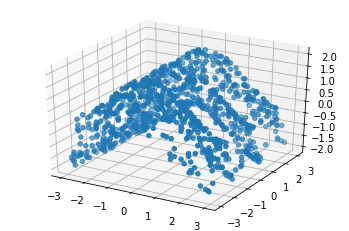

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

Method 2

In [4]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(
       data=[go.Scatter3d(x=X[:,0], 
                          y=X[:,1], 
                          z=Y[:],
                       mode='markers')])

fig.show()

In [5]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(
       data=[go.Scatter3d(x=X[:,0], 
                          y=X[:,1], 
                          z=Y[:],
                                   
             mode='markers',
             marker=dict(
                size=3,
                color=Y,                # set color to an array/list of desired values
                colorscale='Viridis',   # choose a colorscale
                opacity=0.8)
                )])
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### **Instantiate or Build the Model**

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

### **Train the model**

Compile & fit

- First try `sgd`, notice the poor accuracy
- Then try `Adam`, whose learning rate by default is 0.001

In [7]:
model.compile(optimizer='Adam', loss='mean_squared_error')
r = model.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 3ms/step - loss: 0.8272
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6432
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5700
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5287
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5072
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4902
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4842
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4744
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4681
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4701
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4653
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4619
Epoch 13/100
32/32 [=================

- Now try `Adam` optimizer with learning rate = 0.01.
- Notice the improvement in Accuracy or decrease in loss
- So always experiment for such things

In [8]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer= opt, loss='mean_squared_error')
r = model.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4871
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4411
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3928
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3977
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4091
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3831
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3856
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3850
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4173
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3612
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3705
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4222
Epoch 13/100
32/32 [=================

### **Plotting Loss per Iteration**


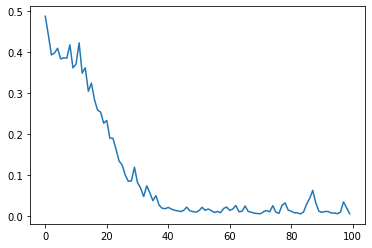

In [9]:
plt.plot(r.history['loss'], label='loss')

### **Prediction**

plotting prediction surface

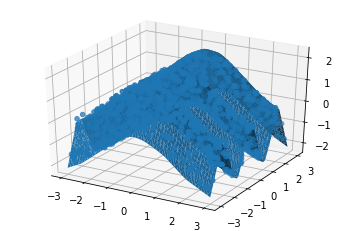

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx,yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T # Because ML model expects an n/2 array as input
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased=True)
plt.show()

### **Can the model extrapolate the results?**

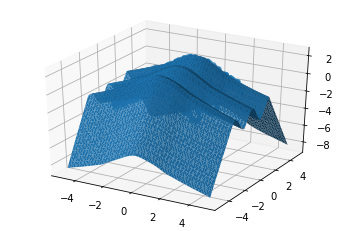

In [15]:
# Plotting the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot 
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True)
plt.show()

`Note`: The above thing does'nt work...
- Because NN does not use a periodic activation function.
So it cant be expecte to be periopic with respect to the inputs